# **Part 1: Exploratory Data Analysis**

**1.	Load and explore the dataset to understand its structure**

In [2]:
import pandas as pd
df = pd.read_csv('/content/MoMTSim_20240722202413_1000_dataset.csv')

print("Dataset:")
print(df.head())

print("\nDataset Info:")
print(df.info())

print("\nDataset Shape (rows, columns):")
print(df.shape)

print("\nColumn Names:")
print(list(df.columns))

Dataset:
   step transactionType  amount     initiator  oldBalInitiator  \
0     0         PAYMENT  579.16  4.018808e+15            29.32   
1     0        TRANSFER   39.03  4.610594e+15            39.03   
2     0        TRANSFER   21.78  4.840578e+15            21.78   
3     0         PAYMENT  570.22  4.958067e+15             5.29   
4     0         PAYMENT  574.80  4.149196e+15            82.63   

   newBalInitiator         recipient  oldBalRecipient  newBalRecipient  \
0            29.32        30-0000345             0.00             0.00   
1             0.00  4944921135715488            55.94            94.98   
2             0.00  4305579785620656            58.09            79.88   
3             5.29        00-0000388             0.00             0.00   
4            82.63        80-0005320             0.00             0.00   

   isFraud  
0      0.0  
1      1.0  
2      1.0  
3      0.0  
4      0.0  

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 274209

**2.	Identify and handle missing values**

In [3]:
print("Missing Values per Column:")
missing_values = df.isnull().sum()
print(missing_values)

print("\nPercentage of Missing Values per Column:")
missing_percentage = (df.isnull().sum() / len(df)) * 100
print(missing_percentage)

if missing_values.sum() > 0:
    # For numerical columns, fill with median
    numerical_cols = ['amount','initiator', 'oldBalInitiator', 'newBalInitiator',
                      'oldBalRecipient', 'newBalRecipient', 'isFraud']
    for col in numerical_cols:
        if df[col].isnull().sum() > 0:
            df[col].fillna(df[col].median(), inplace=True)


    # For categorical columns, fill with mode
    categorical_cols = ['transactionType', 'recipient']
    for col in categorical_cols:
        if df[col].isnull().sum() > 0:
            df[col].fillna(df[col].mode()[0], inplace=True)

else:
    print("\nNo missing values found in the dataset.")

print("\nMissing Values After Handling:")
print(df.isnull().sum())

Missing Values per Column:
step               0
transactionType    0
amount             1
initiator          1
oldBalInitiator    1
newBalInitiator    1
recipient          1
oldBalRecipient    1
newBalRecipient    1
isFraud            1
dtype: int64

Percentage of Missing Values per Column:
step               0.000000
transactionType    0.000000
amount             0.000365
initiator          0.000365
oldBalInitiator    0.000365
newBalInitiator    0.000365
recipient          0.000365
oldBalRecipient    0.000365
newBalRecipient    0.000365
isFraud            0.000365
dtype: float64

Missing Values After Handling:
step               0
transactionType    0
amount             0
initiator          0
oldBalInitiator    0
newBalInitiator    0
recipient          0
oldBalRecipient    0
newBalRecipient    0
isFraud            0
dtype: int64


<ipython-input-3-210f56bfe73b>:15: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)
<ipython-input-3-210f56bfe73b>:22: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 

**3.	Analyze the distribution of features and target classes**

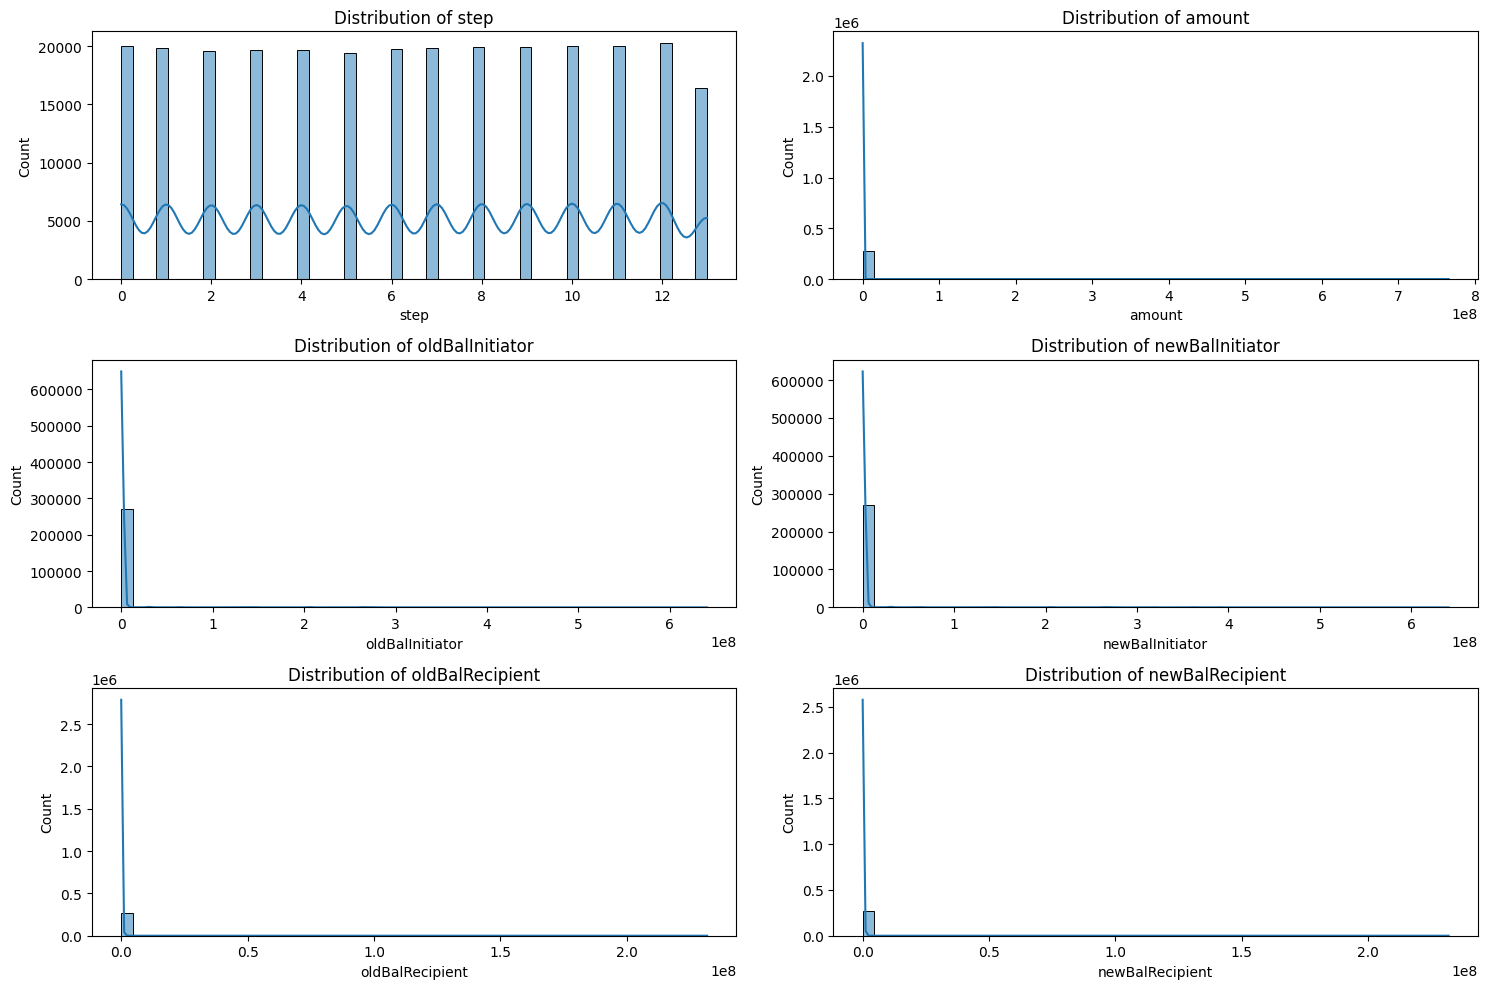

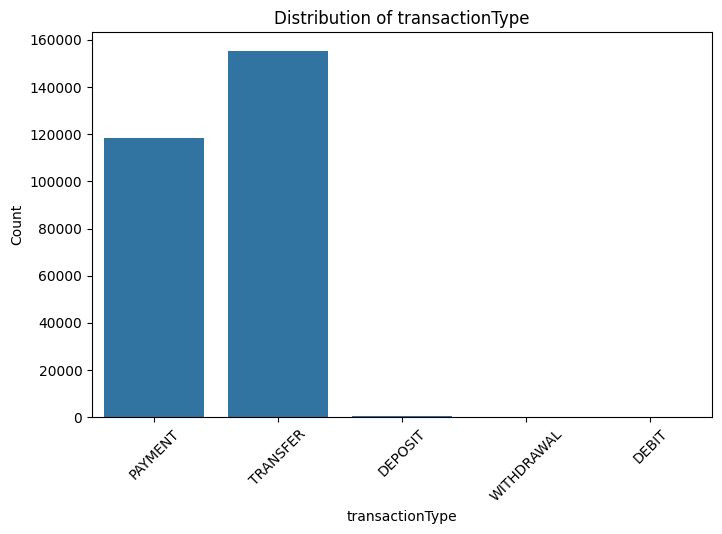

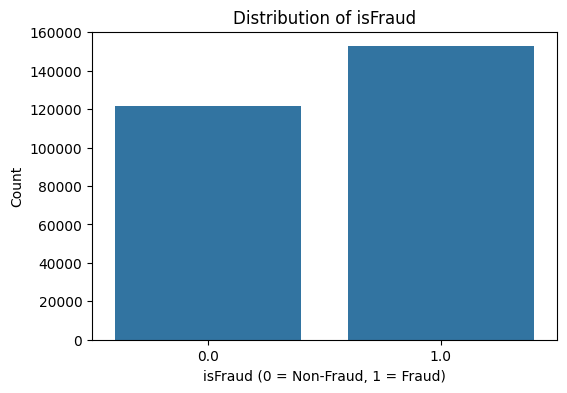


Summary Statistics for Numerical Features:
                step        amount  oldBalInitiator  newBalInitiator  \
count  274209.000000  2.742090e+05     2.742090e+05     2.742090e+05   
mean        6.439924  3.261761e+05     2.745234e+06     2.982388e+06   
std         3.997138  8.756496e+06     2.576359e+07     2.688730e+07   
min         0.000000  0.000000e+00    -1.999233e+05    -1.999233e+05   
25%         3.000000  8.565000e+01     2.142000e+01     0.000000e+00   
50%         6.000000  5.812300e+02     9.502000e+01     0.000000e+00   
75%        10.000000  1.083564e+04     1.453365e+04     1.317740e+03   
max        13.000000  7.654805e+08     6.409231e+08     6.409231e+08   

       oldBalRecipient  newBalRecipient  
count     2.742090e+05     2.742090e+05  
mean      1.394745e+05     1.606090e+05  
std       1.817298e+06     1.915961e+06  
min       0.000000e+00     0.000000e+00  
25%       1.199660e+03     2.954610e+03  
50%       7.158500e+03     9.569615e+03  
75%       7.3

In [4]:
#'initiator' and 'recipient' are IDs, so we won't plot their distributions
# as they are likely unique identifiers with many distinct values.

import matplotlib.pyplot as plt
import seaborn as sns

#Numerical Features Distribution by Histograms
numerical_cols = ['step', 'amount', 'oldBalInitiator', 'newBalInitiator',
                  'oldBalRecipient', 'newBalRecipient']
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(3, 2, i)
    sns.histplot(df[col], bins=50, kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
plt.tight_layout()
plt.show()

#Categorical Features Distribution by Bar chart
categorical_cols = ['transactionType']
plt.figure(figsize=(8, 5))
for col in categorical_cols:
    sns.countplot(x=col, data=df)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
plt.show()

#Target Class Distribution (isFraud)
plt.figure(figsize=(6, 4))
sns.countplot(x='isFraud', data=df)
plt.title('Distribution of isFraud')
plt.xlabel('isFraud (0 = Non-Fraud, 1 = Fraud)')
plt.ylabel('Count')
plt.show()

#Summary Statistics for Numerical Features
print("\nSummary Statistics for Numerical Features:")
print(df[numerical_cols].describe())

# Class Distribution of isFraud (in counts and percentages)
print("\nClass Distribution of isFraud (Counts):")
print(df['isFraud'].value_counts())
print("\nClass Distribution of isFraud (Percentages):")
print(df['isFraud'].value_counts(normalize=True) * 100)

**4.	Identify potential outliers and determine how to handle them:**

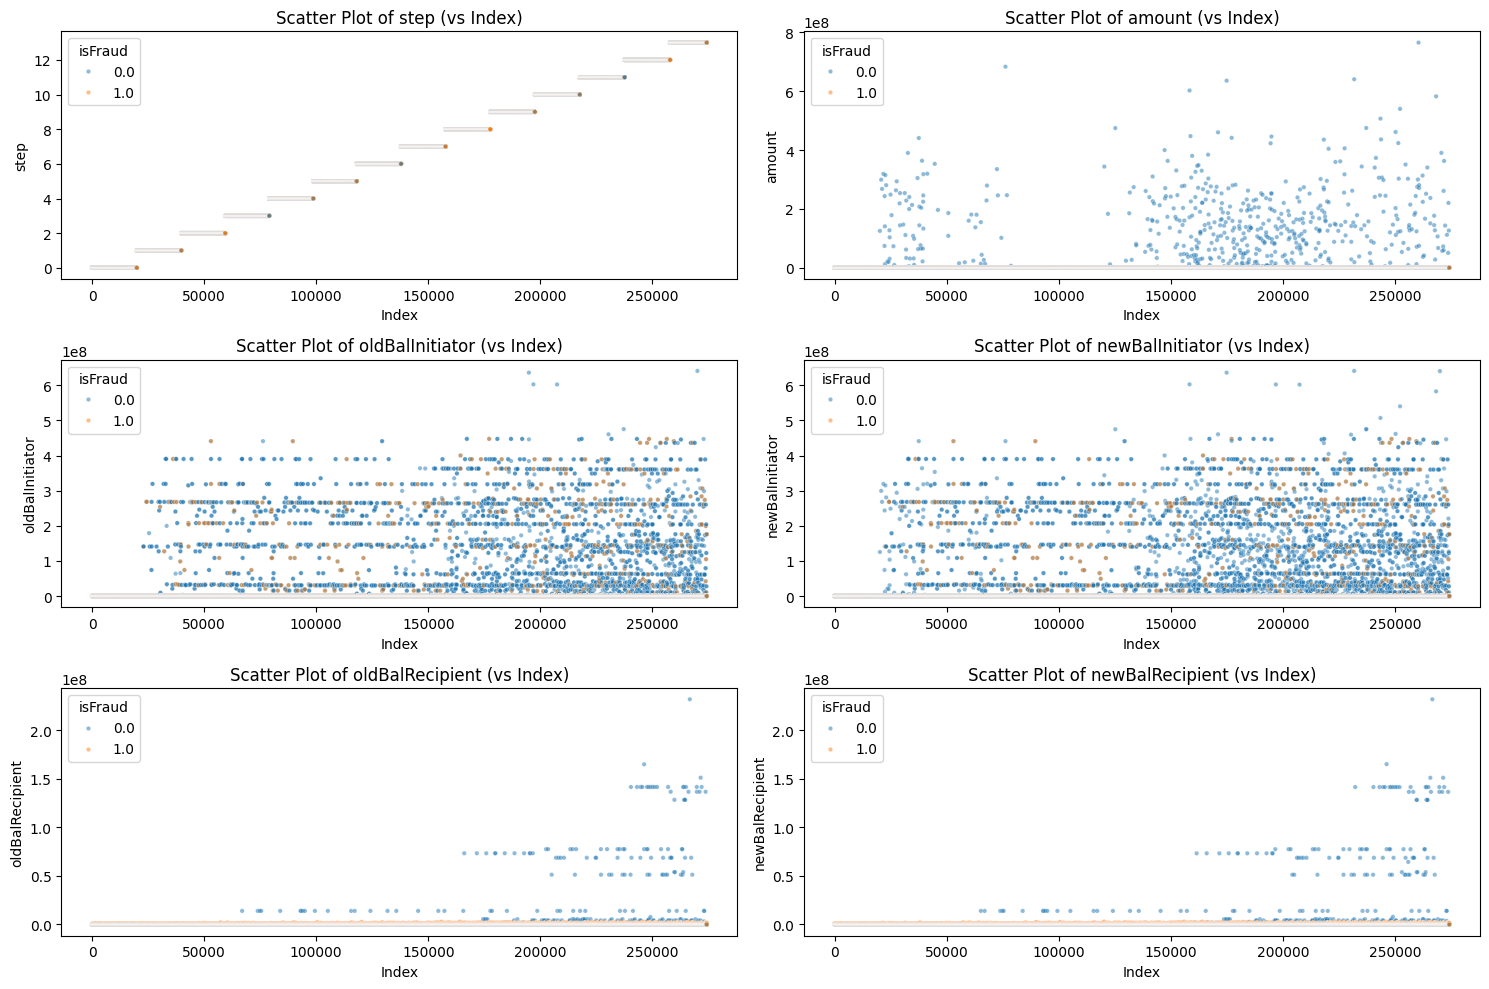


Potential Outliers (Z-Score > 3):
step: 0 outliers detected
amount: 465 outliers detected
Sample outlier values for amount:
[125417439.74, 299389011.17, 268180683.45, 319295899.81, 74260358.72]
oldBalInitiator: 2920 outliers detected
Sample outlier values for oldBalInitiator:
[141044218.57, 141043656.31, 141025684.1, 141025122.43, 268174662.34]
newBalInitiator: 3231 outliers detected
Sample outlier values for newBalInitiator:
[125417521.83, 299389051.26, 268174662.34, 319295900.74, 243659233.8]
oldBalRecipient: 132 outliers detected
Sample outlier values for oldBalRecipient:
[13949496.53, 13949496.53, 13949496.53, 13950043.26, 13950043.26]
newBalRecipient: 142 outliers detected
Sample outlier values for newBalRecipient:
[13949496.53, 13949496.53, 13949496.53, 13950043.26, 13950043.26]

Observations:
step: 0 potential outliers (IQR method preview)
amount: 31645 potential outliers (IQR method preview)
oldBalInitiator: 51710 potential outliers (IQR method preview)
newBalInitiator: 66481 

In [5]:

# Identify potential outliers
numerical_cols = ['step', 'amount', 'oldBalInitiator', 'newBalInitiator',
                  'oldBalRecipient', 'newBalRecipient']

# Visual Inspection with Scatter Plots
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(3, 2, i)
    sns.scatterplot(x=df.index, y=df[col], hue=df['isFraud'], alpha=0.5, s=10)
    plt.title(f'Scatter Plot of {col} (vs Index)')
    plt.xlabel('Index')
    plt.ylabel(col)
plt.tight_layout()
plt.show()

# Basic Outlier Detection using Z-Score (Threshold > 3)
def detect_outliers_zscore(data, column, threshold=3):
    mean = data[column].mean()
    std = data[column].std()
    z_scores = (data[column] - mean) / std
    outliers = data[abs(z_scores) > threshold]
    return len(outliers), outliers

print("\nPotential Outliers (Z-Score > 3):")
for col in numerical_cols:
    num_outliers, outliers = detect_outliers_zscore(df, col)
    print(f"{col}: {num_outliers} outliers detected")
    if num_outliers > 0:
        print(f"Sample outlier values for {col}:")
        print(outliers[col].head().to_list())

print("\nObservations:")
for col in numerical_cols:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    num_outliers_iqr = len(df[(df[col] < lower_bound) | (df[col] > upper_bound)])
    print(f"{col}: {num_outliers_iqr} potential outliers (IQR method preview)")

**5.	Use boxplot visualizations for each numerical feature to detect outliers**

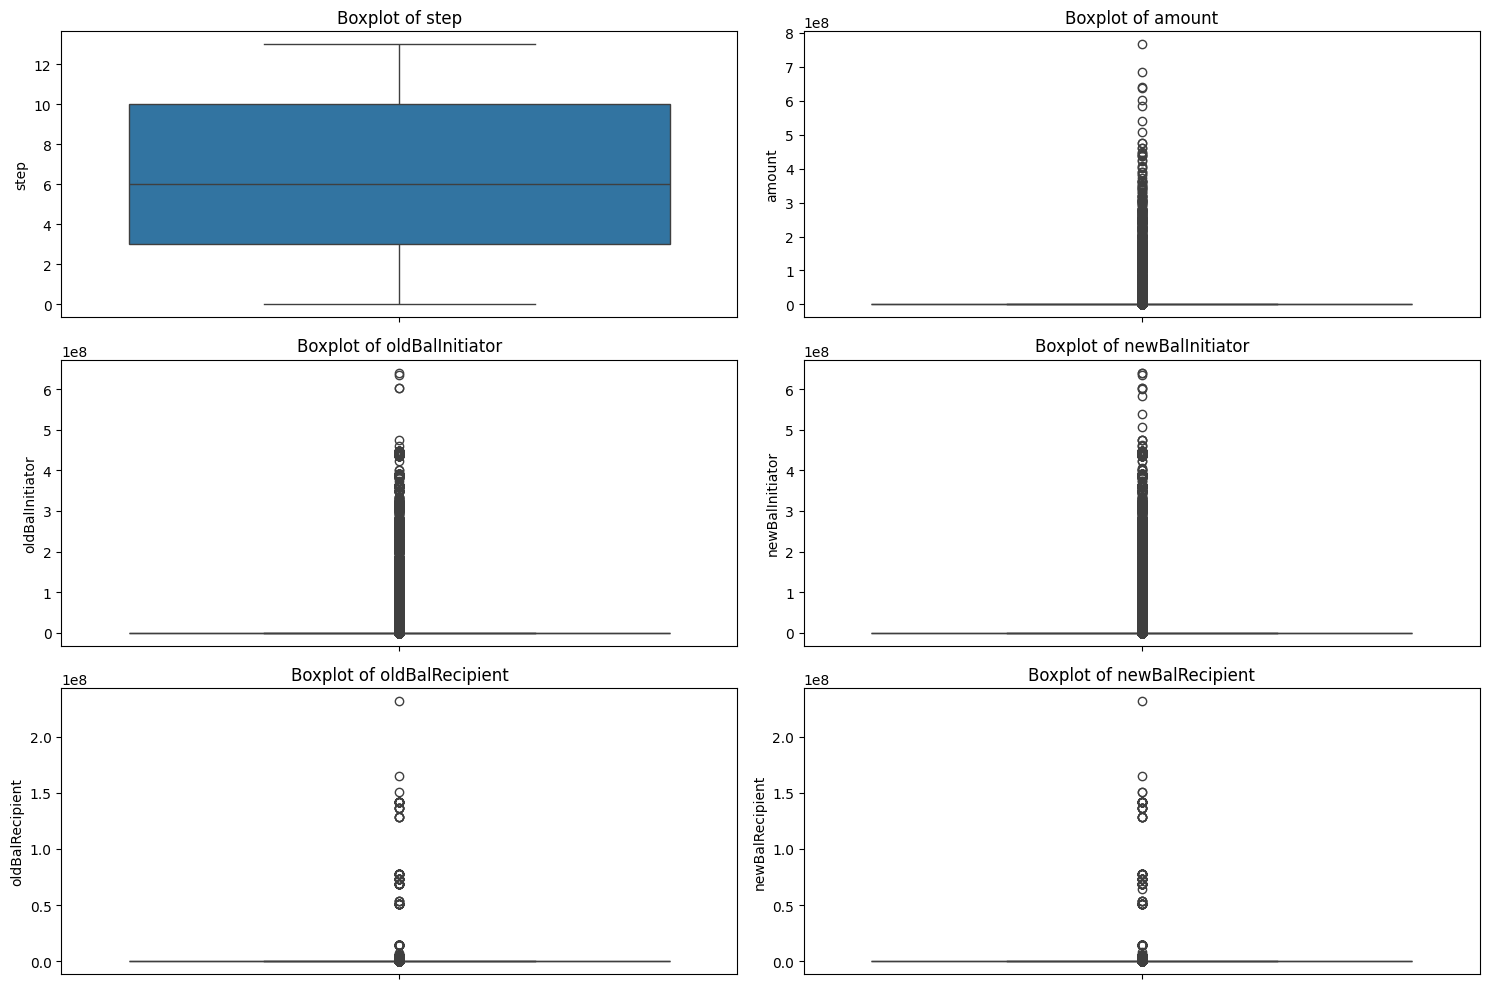


Boxplots with Log Scale for Skewed Features:


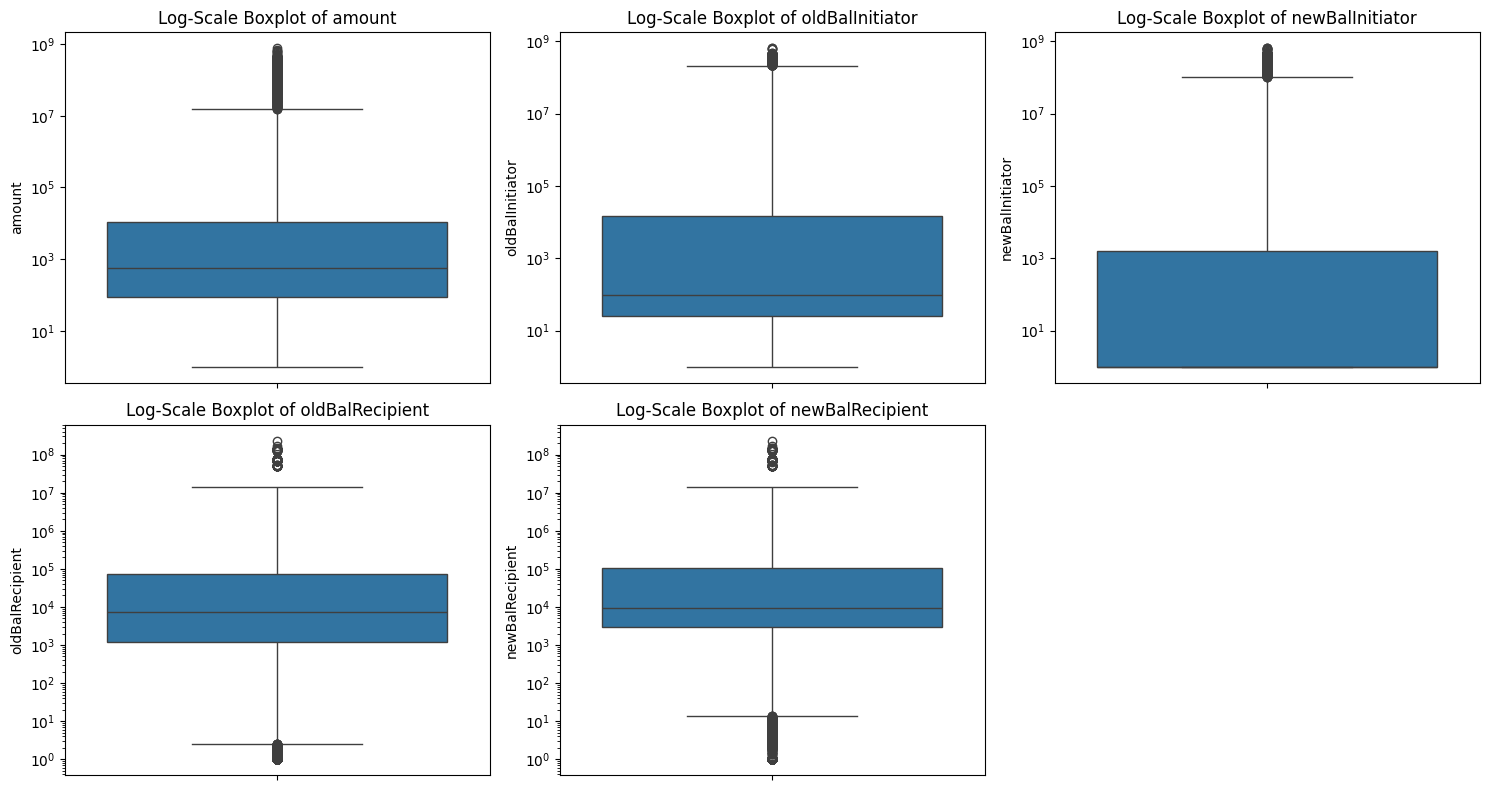

In [6]:

# By boxplot visualizations for each numerical feature
numerical_cols = ['step', 'amount', 'oldBalInitiator', 'newBalInitiator',
                  'oldBalRecipient', 'newBalRecipient']

plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(3, 2, i)
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot of {col}')
    plt.ylabel(col)
plt.tight_layout()
plt.show()

# By Log-scale boxplots for highly skewed features
print("\nBoxplots with Log Scale for Skewed Features:")
skewed_cols = ['amount', 'oldBalInitiator', 'newBalInitiator',
               'oldBalRecipient', 'newBalRecipient']
plt.figure(figsize=(15, 8))
for i, col in enumerate(skewed_cols, 1):
    plt.subplot(2, 3, i)
    # Add 1 to avoid log(0) issues
    sns.boxplot(y=df[col].apply(lambda x: x + 1 if x >= 0 else x), log_scale=True)
    plt.title(f'Log-Scale Boxplot of {col}')
    plt.ylabel(col)
plt.tight_layout()
plt.show()

**6.	Apply the IQR (Interquartile Range) method with boxplots to quantitatively identify outliers**

IQR Method Outlier Detection:

step:
Q1 = 3.00, Q3 = 10.00, IQR = 7.00
Lower Bound = -7.50, Upper Bound = 20.50
Number of Outliers = 0

amount:
Q1 = 85.65, Q3 = 10835.64, IQR = 10749.99
Lower Bound = -16039.34, Upper Bound = 26960.62
Number of Outliers = 31645
Sample Outlier Values: [34461.78, 29845.9, 40848.2, 72645.31, 48992.36]

oldBalInitiator:
Q1 = 21.42, Q3 = 14533.65, IQR = 14512.23
Lower Bound = -21746.93, Upper Bound = 36302.00
Number of Outliers = 51710
Sample Outlier Values: [707816.3, 707228.74, 243425.93, 242930.46, 86417.85]

newBalInitiator:
Q1 = 0.00, Q3 = 1317.74, IQR = 1317.74
Lower Bound = -1976.61, Upper Bound = 3294.35
Number of Outliers = 66481
Sample Outlier Values: [707228.74, 689838.97, 242930.46, 208468.68, 85841.98]

oldBalRecipient:
Q1 = 1199.66, Q3 = 73501.93, IQR = 72302.27
Lower Bound = -107253.74, Upper Bound = 181955.33
Number of Outliers = 48324
Sample Outlier Values: [201640.37, 451680.33, 264160.03, 761708.07, 307908.11]

newBalRecipient:
Q1 = 2954.6

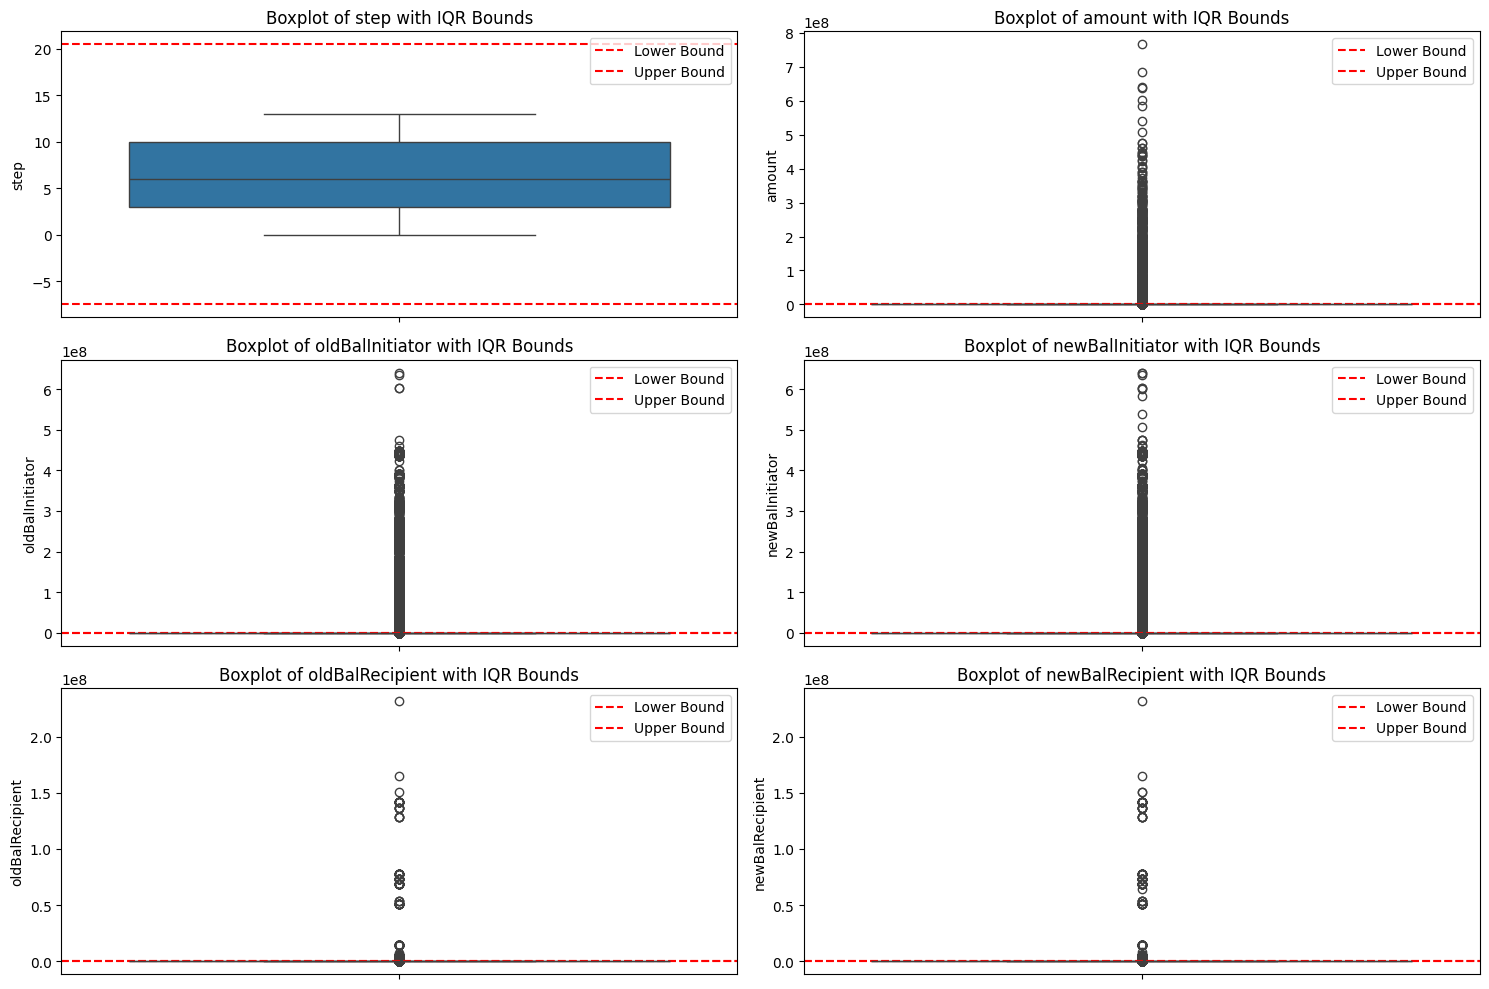

In [7]:

# Apply the IQR method to quantitatively identify outliers
numerical_cols = ['step', 'amount', 'oldBalInitiator', 'newBalInitiator',
                  'oldBalRecipient', 'newBalRecipient']

# Dictionary to store outlier counts and bounds
outlier_info = {}

print("IQR Method Outlier Detection:")
for col in numerical_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identify outliers
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    num_outliers = len(outliers)

    # Store info
    outlier_info[col] = {
        'lower_bound': lower_bound,
        'upper_bound': upper_bound,
        'num_outliers': num_outliers,
        'outliers': outliers[col]
    }

    print(f"\n{col}:")
    print(f"Q1 = {Q1:.2f}, Q3 = {Q3:.2f}, IQR = {IQR:.2f}")
    print(f"Lower Bound = {lower_bound:.2f}, Upper Bound = {upper_bound:.2f}")
    print(f"Number of Outliers = {num_outliers}")
    if num_outliers > 0:
        print(f"Sample Outlier Values: {outliers[col].head().to_list()}")

plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(3, 2, i)
    sns.boxplot(y=df[col])
    plt.axhline(outlier_info[col]['lower_bound'], color='r', linestyle='--', label='Lower Bound')
    plt.axhline(outlier_info[col]['upper_bound'], color='r', linestyle='--', label='Upper Bound')
    plt.title(f'Boxplot of {col} with IQR Bounds')
    plt.ylabel(col)
    plt.legend()
plt.tight_layout()
plt.show()

**7.	Visualize outliers using boxplots across different target classes**

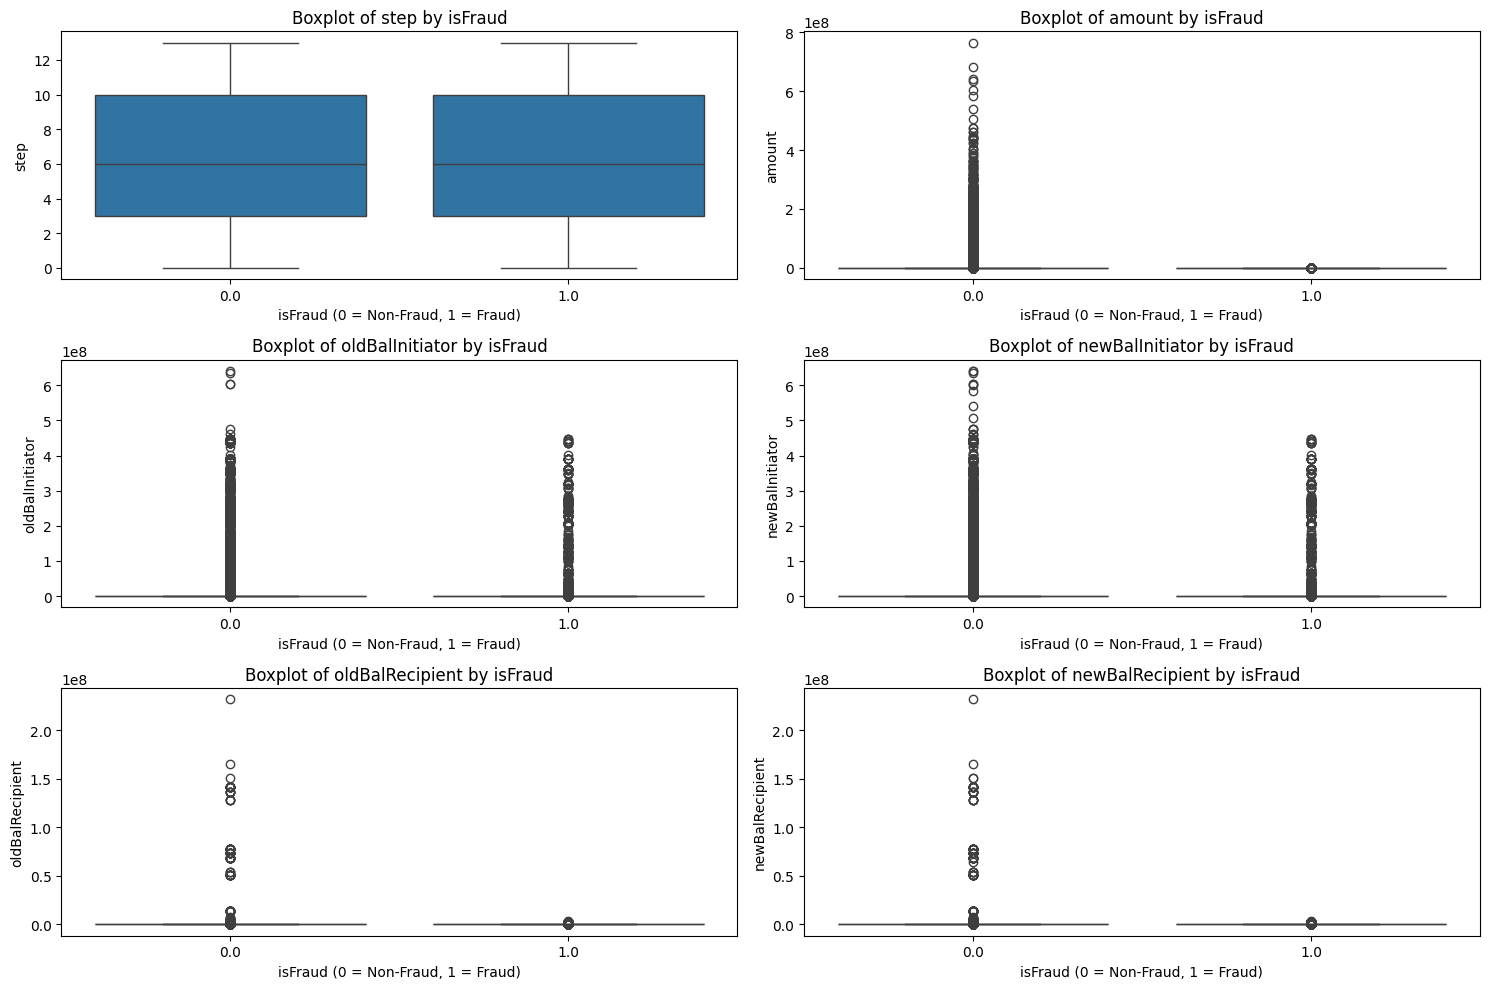


Log-Scale Boxplots by isFraud for Skewed Features:


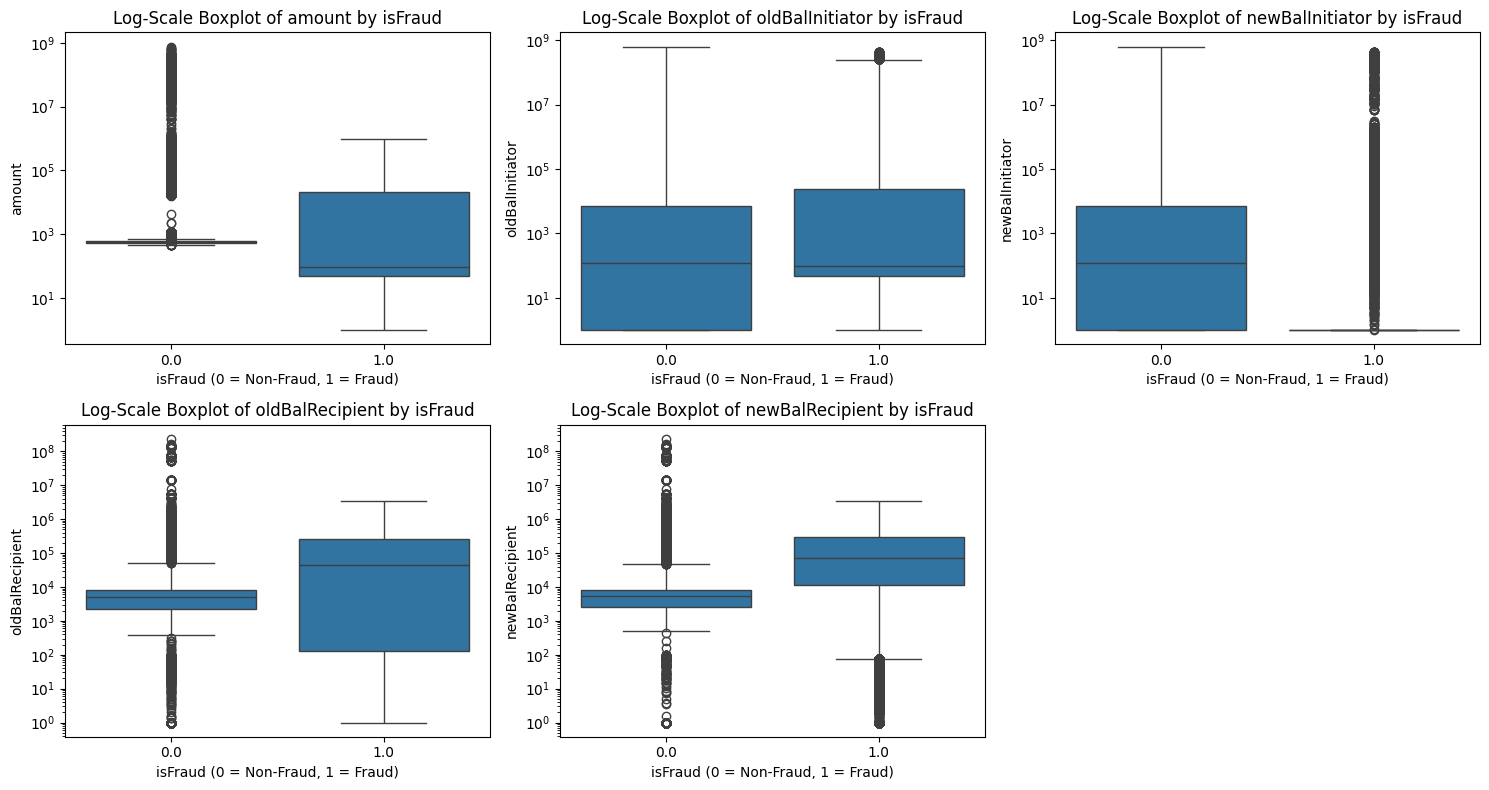

In [8]:
# Standard boxplots grouped by isFraud
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(3, 2, i)
    sns.boxplot(x='isFraud', y=col, data=df)
    plt.title(f'Boxplot of {col} by isFraud')
    plt.xlabel('isFraud (0 = Non-Fraud, 1 = Fraud)')
    plt.ylabel(col)
plt.tight_layout()
plt.show()

# Log-scale boxplots for skewed features
print("\nLog-Scale Boxplots by isFraud for Skewed Features:")
skewed_cols = ['amount', 'oldBalInitiator', 'newBalInitiator',
               'oldBalRecipient', 'newBalRecipient']
plt.figure(figsize=(15, 8))
for i, col in enumerate(skewed_cols, 1):
    plt.subplot(2, 3, i)
    # Add 1 to avoid log(0) issues, handle negatives
    sns.boxplot(x='isFraud', y=df[col].apply(lambda x: x + 1 if x >= 0 else x),
                data=df, log_scale=True)
    plt.title(f'Log-Scale Boxplot of {col} by isFraud')
    plt.xlabel('isFraud (0 = Non-Fraud, 1 = Fraud)')
    plt.ylabel(col)
plt.tight_layout()
plt.show()

**8.	Compare results with at least one other outlier detection method**

Isolation Forest Outlier Detection:
step: 26115 outliers detected
amount: 27421 outliers detected
oldBalInitiator: 27342 outliers detected
newBalInitiator: 6641 outliers detected
oldBalRecipient: 25345 outliers detected
newBalRecipient: 27397 outliers detected

Comparison with IQR Method:
step: IQR = 0, Isolation Forest = 26115
amount: IQR = 31645, Isolation Forest = 27421
oldBalInitiator: IQR = 51710, Isolation Forest = 27342
newBalInitiator: IQR = 66481, Isolation Forest = 6641
oldBalRecipient: IQR = 48324, Isolation Forest = 25345
newBalRecipient: IQR = 43696, Isolation Forest = 27397


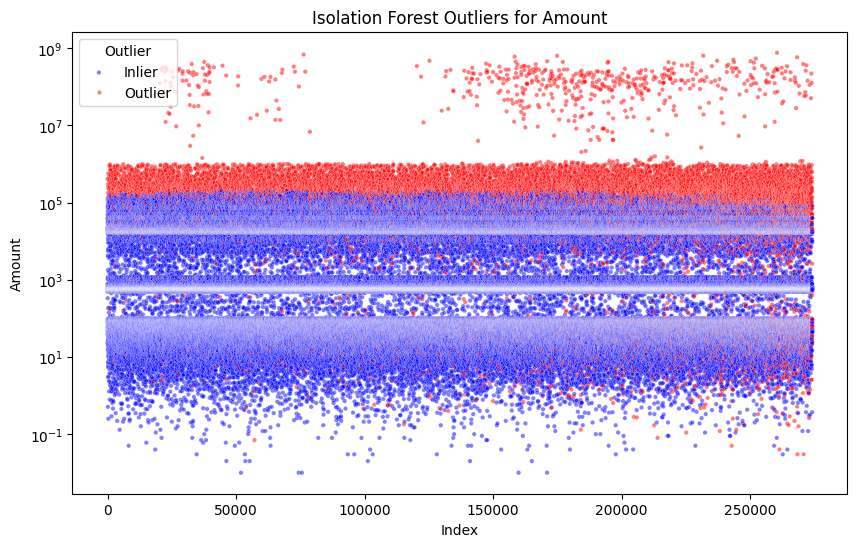

In [9]:
import numpy as np
from sklearn.ensemble import IsolationForest

# Compare IQR results with Isolation Forest
numerical_cols = ['step', 'amount', 'oldBalInitiator', 'newBalInitiator',
                  'oldBalRecipient', 'newBalRecipient']

# ANother Technique to detcect Outlier By Apply Isolation Forest
# Prepare data for Isolation Forest (numerical features only)
X = df[numerical_cols]

# Fit Isolation Forest (contamination=0.1 means we expect ~10% outliers)
iso_forest = IsolationForest(contamination=0.1, random_state=42)
iso_forest.fit(X)

# Predict outliers (-1 = outlier, 1 = inlier)
df['iso_outlier'] = iso_forest.predict(X)

# Count outliers per feature (Isolation Forest flags entire rows, so we check each feature)
print("Isolation Forest Outlier Detection:")
iso_outlier_counts = {}
for col in numerical_cols:
    # Outliers in this feature (where row is flagged as outlier)
    num_outliers = len(df[(df['iso_outlier'] == -1) & (df[col] != 0)])
    iso_outlier_counts[col] = num_outliers
    print(f"{col}: {num_outliers} outliers detected")

# Compare with IQR results
print("\nComparison with IQR Method:")
for col in numerical_cols:
    # Recalculate IQR outliers for reference
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    iqr_outliers = len(df[(df[col] < lower_bound) | (df[col] > upper_bound)])
    print(f"{col}: IQR = {iqr_outliers}, Isolation Forest = {iso_outlier_counts[col]}")

# Visualize Isolation Forest outliers
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df.index, y=df['amount'], hue=df['iso_outlier'],
                palette={1: 'blue', -1: 'red'}, alpha=0.5, s=10)
plt.title('Isolation Forest Outliers for Amount')
plt.xlabel('Index')
plt.ylabel('Amount')
plt.yscale('log')  # Log scale for better visualization
plt.legend(title='Outlier', labels=['Inlier', 'Outlier'])
plt.show()

**9.	Propose and implement a strategy for handling the detected outliers**


Capped outliers for step:
Lower Bound = -7.50, Upper Bound = 20.50
New Min = 0.00, New Max = 13.00

Capped outliers for amount:
Lower Bound = -16039.34, Upper Bound = 26960.62
New Min = 0.00, New Max = 26960.62

Capped outliers for oldBalInitiator:
Lower Bound = -21746.93, Upper Bound = 36302.00
New Min = -21746.93, New Max = 36302.00

Capped outliers for newBalInitiator:
Lower Bound = -1976.61, Upper Bound = 3294.35
New Min = -1976.61, New Max = 3294.35

Capped outliers for oldBalRecipient:
Lower Bound = -107253.74, Upper Bound = 181955.33
New Min = 0.00, New Max = 181955.33

Capped outliers for newBalRecipient:
Lower Bound = -154072.80, Upper Bound = 264666.96
New Min = 0.00, New Max = 264666.96

Applied log transformation to amount:
Shifted by 1.00 to handle min value 0.00
New Min (log) = 0.69, New Max (log) = 10.20

Applied log transformation to oldBalInitiator:
Shifted by 21747.93 to handle min value -21746.93
New Min (log) = 0.69, New Max (log) = 10.97

Applied log transformatio

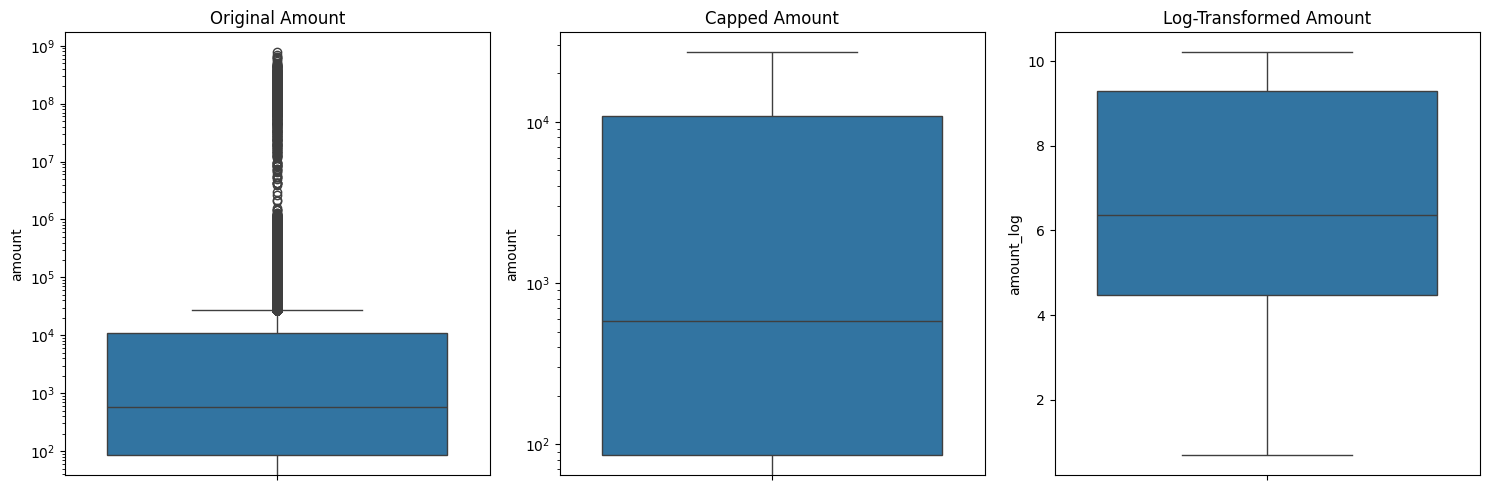


Summary Statistics Before Capping:
                step        amount  oldBalInitiator  newBalInitiator  \
count  274209.000000  2.742090e+05     2.742090e+05     2.742090e+05   
mean        6.439924  3.261761e+05     2.745234e+06     2.982388e+06   
std         3.997138  8.756496e+06     2.576359e+07     2.688730e+07   
min         0.000000  0.000000e+00    -1.999233e+05    -1.999233e+05   
25%         3.000000  8.565000e+01     2.142000e+01     0.000000e+00   
50%         6.000000  5.812300e+02     9.502000e+01     0.000000e+00   
75%        10.000000  1.083564e+04     1.453365e+04     1.317740e+03   
max        13.000000  7.654805e+08     6.409231e+08     6.409231e+08   

       oldBalRecipient  newBalRecipient  
count     2.742090e+05     2.742090e+05  
mean      1.394745e+05     1.606090e+05  
std       1.817298e+06     1.915961e+06  
min       0.000000e+00     0.000000e+00  
25%       1.199660e+03     2.954610e+03  
50%       7.158500e+03     9.569615e+03  
75%       7.350193e+0

In [10]:

# Cap outliers using IQR bounds
df_capped = df.copy()
for col in numerical_cols:
    # Calculate IQR bounds
    Q1 = df_capped[col].quantile(0.25)
    Q3 = df_capped[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Cap values
    df_capped[col] = df_capped[col].clip(lower=lower_bound, upper=upper_bound)
    print(f"\nCapped outliers for {col}:")
    print(f"Lower Bound = {lower_bound:.2f}, Upper Bound = {upper_bound:.2f}")
    print(f"New Min = {df_capped[col].min():.2f}, New Max = {df_capped[col].max():.2f}")

# Apply log transformation to skewed features (handle negatives and zeros)
skewed_cols = ['amount', 'oldBalInitiator', 'newBalInitiator',
               'oldBalRecipient', 'newBalRecipient']
for col in skewed_cols:
    # Shift values to ensure all are positive (add 1 to handle zeros)
    min_val = df_capped[col].min()
    shift = abs(min_val) + 1 if min_val <= 0 else 1
    df_capped[f'{col}_log'] = np.log1p(df_capped[col] + shift)
    print(f"\nApplied log transformation to {col}:")
    print(f"Shifted by {shift:.2f} to handle min value {min_val:.2f}")
    print(f"New Min (log) = {df_capped[f'{col}_log'].min():.2f}, "
          f"New Max (log) = {df_capped[f'{col}_log'].max():.2f}")

# Visualize the effect of capping and transformation
plt.figure(figsize=(15, 5))

# Original
plt.subplot(1, 3, 1)
sns.boxplot(y=df['amount'])
plt.title('Original Amount')
plt.yscale('log')

# Capped
plt.subplot(1, 3, 2)
sns.boxplot(y=df_capped['amount'])
plt.title('Capped Amount')
plt.yscale('log')

# Log-Transformed
plt.subplot(1, 3, 3)
sns.boxplot(y=df_capped['amount_log'])
plt.title('Log-Transformed Amount')

plt.tight_layout()
plt.show()

# Summary of changes
print("\nSummary Statistics Before Capping:")
print(df[numerical_cols].describe())
print("\nSummary Statistics After Capping:")
print(df_capped[numerical_cols].describe())

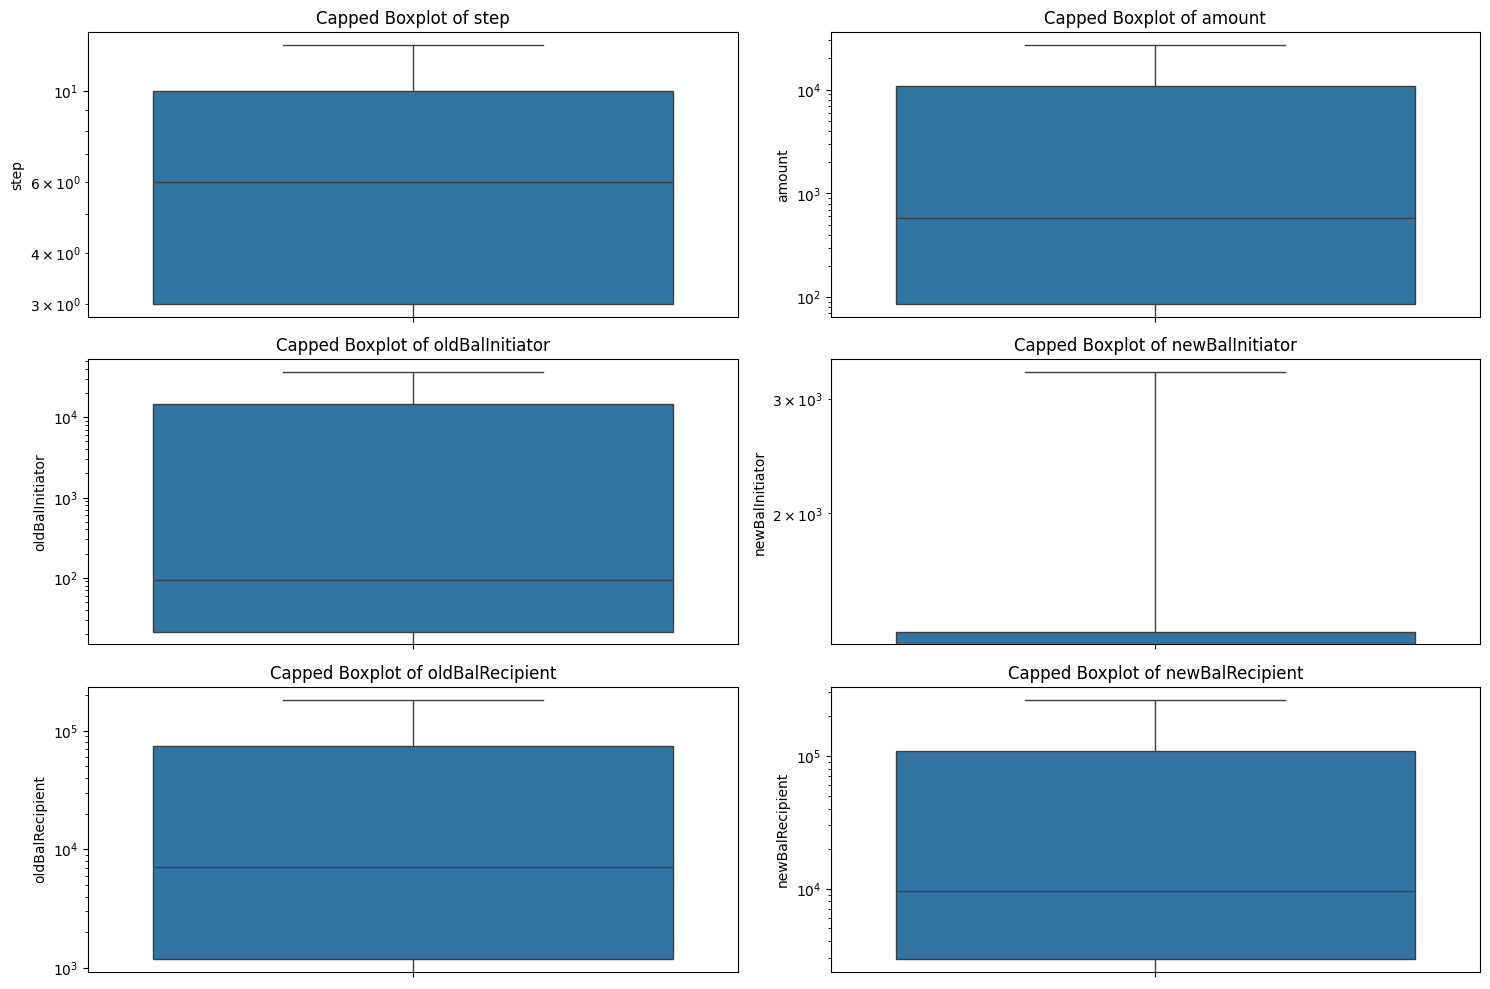

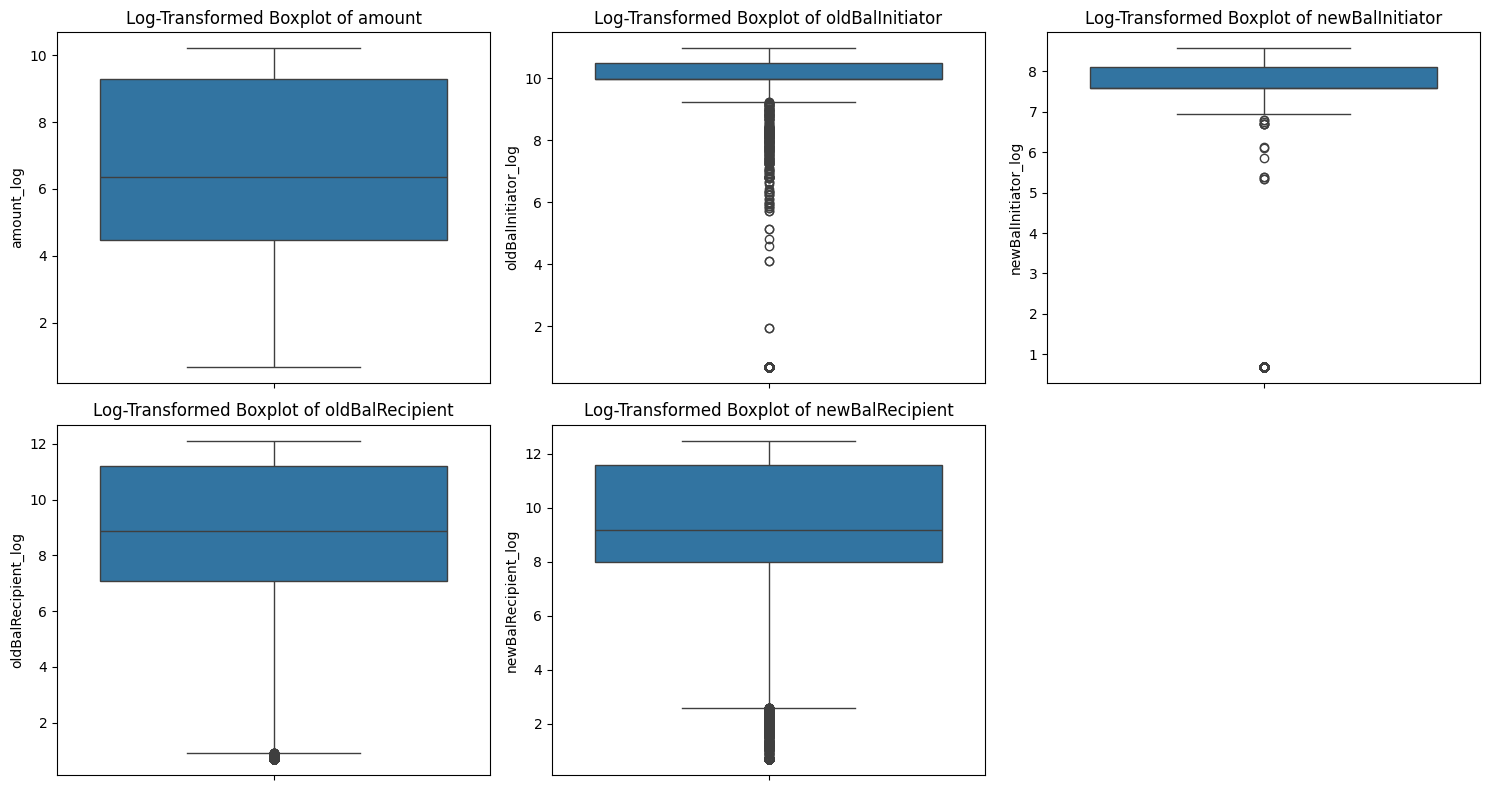

In [11]:
# Visualize the effect of capping for all numerical features
numerical_cols = ['step', 'amount', 'oldBalInitiator', 'newBalInitiator',
                  'oldBalRecipient', 'newBalRecipient']

plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(3, 2, i)
    sns.boxplot(y=df_capped[col])
    plt.title(f'Capped Boxplot of {col}')
    plt.ylabel(col)
    plt.yscale('log')  # Use log scale for better visualization
plt.tight_layout()
plt.show()

# Visualize the log-transformed features
skewed_cols = ['amount', 'oldBalInitiator', 'newBalInitiator',
               'oldBalRecipient', 'newBalRecipient']
plt.figure(figsize=(15, 8))
for i, col in enumerate(skewed_cols, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(y=df_capped[f'{col}_log'])
    plt.title(f'Log-Transformed Boxplot of {col}')
    plt.ylabel(f'{col}_log')
plt.tight_layout()
plt.show()

**10.	Visualize relationships between features and target classes (minimum 3 different visualization types)**

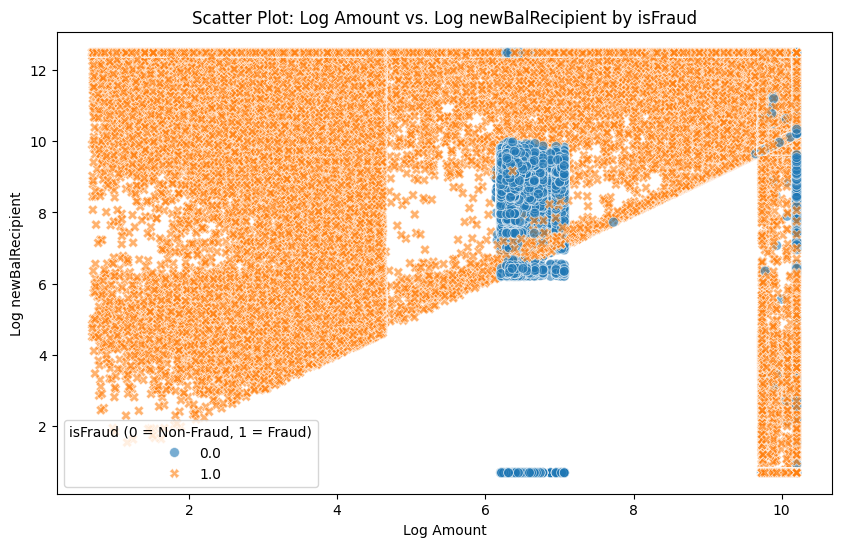

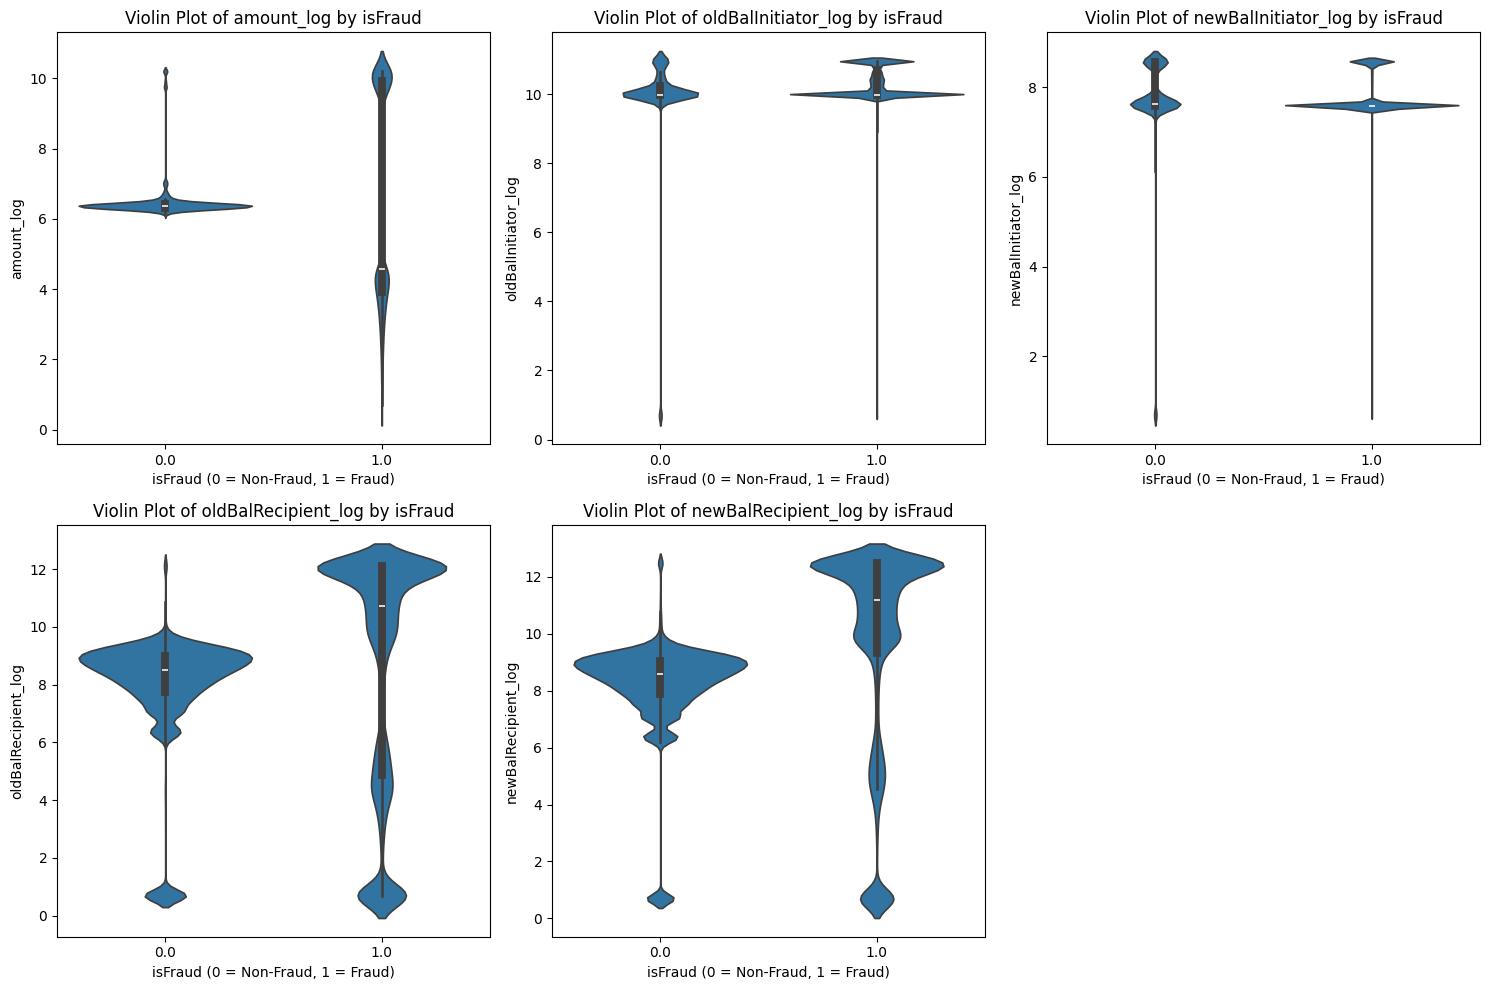

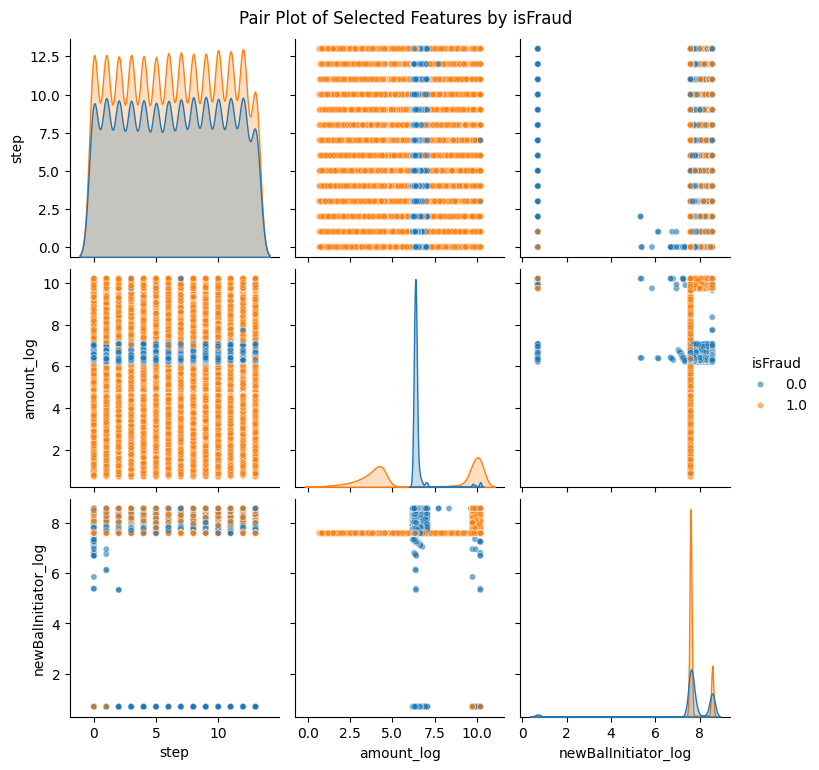

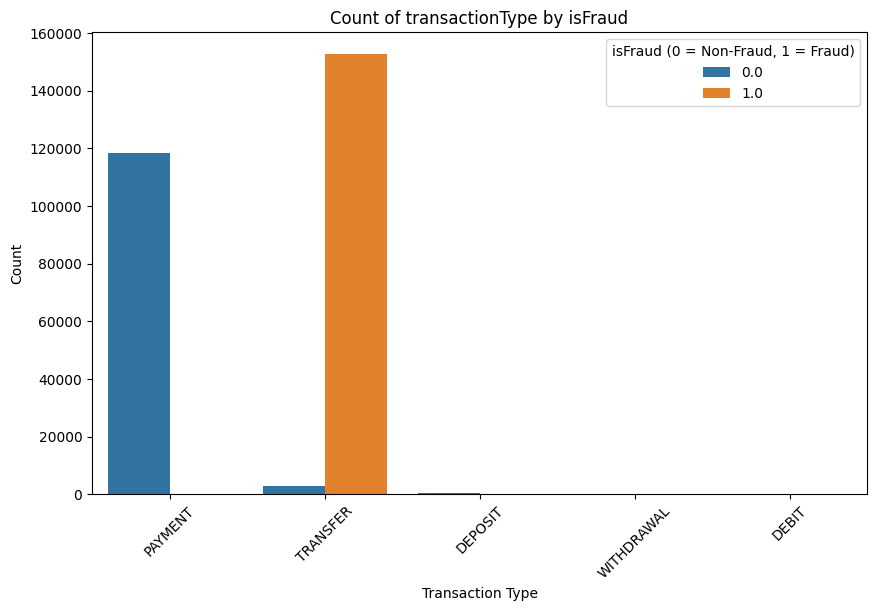

In [12]:

# Scatter Plot (Log-Transformed Amount vs. Log-Transformed newBalRecipient, colored by isFraud)
plt.figure(figsize=(10, 6))
sns.scatterplot(x='amount_log', y='newBalRecipient_log', hue='isFraud', style='isFraud',
                data=df_capped, alpha=0.6, s=50)
plt.title('Scatter Plot: Log Amount vs. Log newBalRecipient by isFraud')
plt.xlabel('Log Amount')
plt.ylabel('Log newBalRecipient')
plt.legend(title='isFraud (0 = Non-Fraud, 1 = Fraud)')
plt.show()

# Violin Plot (Log-Transformed Features by isFraud)
skewed_cols = ['amount_log', 'oldBalInitiator_log', 'newBalInitiator_log',
               'oldBalRecipient_log', 'newBalRecipient_log']
plt.figure(figsize=(15, 10))
for i, col in enumerate(skewed_cols, 1):
    plt.subplot(2, 3, i)
    sns.violinplot(x='isFraud', y=col, data=df_capped)
    plt.title(f'Violin Plot of {col} by isFraud')
    plt.xlabel('isFraud (0 = Non-Fraud, 1 = Fraud)')
    plt.ylabel(col)
plt.tight_layout()
plt.show()

# Pair Plot (Subset of Features, colored by isFraud)
# Select a subset to avoid overloading (step and log-transformed features)
subset_cols = ['step', 'amount_log', 'newBalInitiator_log', 'isFraud']

sns.pairplot(df_capped[subset_cols], hue='isFraud', diag_kind='kde',
             plot_kws={'alpha': 0.6, 's': 20})
plt.suptitle('Pair Plot of Selected Features by isFraud', y=1.02)
plt.show()

# Bonus - Boxplot for Categorical Feature (transactionType vs. isFraud)
plt.figure(figsize=(10, 6))
sns.countplot(x='transactionType', hue='isFraud', data=df_capped)
plt.title('Count of transactionType by isFraud')
plt.xlabel('Transaction Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='isFraud (0 = Non-Fraud, 1 = Fraud)')
plt.show()

**11.	Calculate and interpret correlation matrices for numerical features**

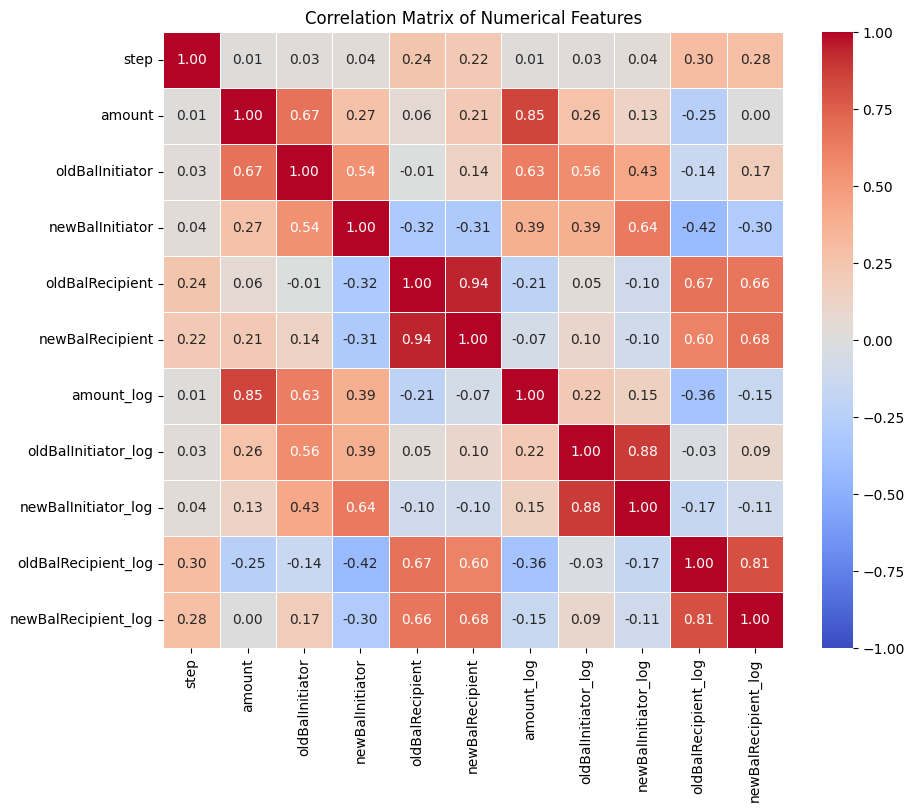

Correlation Matrix Interpretation:

Strong Correlations (|corr| > 0.7):
amount and amount_log: 0.85
oldBalRecipient and newBalRecipient: 0.94
oldBalInitiator_log and newBalInitiator_log: 0.88
oldBalRecipient_log and newBalRecipient_log: 0.81

Correlation of Numerical Features with isFraud:
step                   0.000480
amount                 0.437374
oldBalInitiator        0.159518
newBalInitiator       -0.107838
oldBalRecipient        0.520682
newBalRecipient        0.542591
amount_log             0.023360
oldBalInitiator_log    0.151343
newBalInitiator_log    0.030411
oldBalRecipient_log    0.093810
newBalRecipient_log    0.241348
Name: isFraud, dtype: float64


In [13]:
# Select numerical features (including log-transformed ones, exclude isFraud for now)
numerical_cols = ['step', 'amount', 'oldBalInitiator', 'newBalInitiator',
                  'oldBalRecipient', 'newBalRecipient',
                  'amount_log', 'oldBalInitiator_log', 'newBalInitiator_log',
                  'oldBalRecipient_log', 'newBalRecipient_log']

# Calculate correlation matrix
corr_matrix = df_capped[numerical_cols].corr()

# Visualize correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0,
            fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Numerical Features')
plt.show()

# Interpret the correlation matrix
print("Correlation Matrix Interpretation:")
# Identify strong correlations (|corr| > 0.7)
strong_correlations = []
for i in range(len(corr_matrix.columns)):
    for j in range(i + 1, len(corr_matrix.columns)):
        corr_value = corr_matrix.iloc[i, j]
        if abs(corr_value) > 0.7:
            strong_correlations.append(
                (corr_matrix.columns[i], corr_matrix.columns[j], corr_value)
            )

if strong_correlations:
    print("\nStrong Correlations (|corr| > 0.7):")
    for feat1, feat2, corr in strong_correlations:
        print(f"{feat1} and {feat2}: {corr:.2f}")
else:
    print("\nNo strong correlations (|corr| > 0.7) found.")

# Correlation with isFraud (for reference, though less meaningful for binary target)
corr_with_target = df_capped[numerical_cols + ['isFraud']].corr()['isFraud'].drop('isFraud')
print("\nCorrelation of Numerical Features with isFraud:")
print(corr_with_target)

**12.	Provide statistical summaries of the data**

Statistical Summary of Numerical Features:
                step         amount  oldBalInitiator  newBalInitiator  \
count  274209.000000  274209.000000    274209.000000    274209.000000   
mean        6.439924    6022.496122      8858.309460       814.732300   
std         3.997138    9844.092736     14473.452704      1417.659749   
min         0.000000       0.000000    -21746.925000     -1976.610000   
25%         3.000000      85.650000        21.420000         0.000000   
50%         6.000000     581.230000        95.020000         0.000000   
75%        10.000000   10835.640000     14533.650000      1317.740000   
max        13.000000   26960.625000     36301.995000      3294.350000   

       oldBalRecipient  newBalRecipient     amount_log  oldBalInitiator_log  \
count    274209.000000    274209.000000  274209.000000        274209.000000   
mean      47210.422129     68417.237332       6.551011            10.146686   
std       70398.825475    100195.954551       2.376709        

<Figure size 1200x800 with 0 Axes>

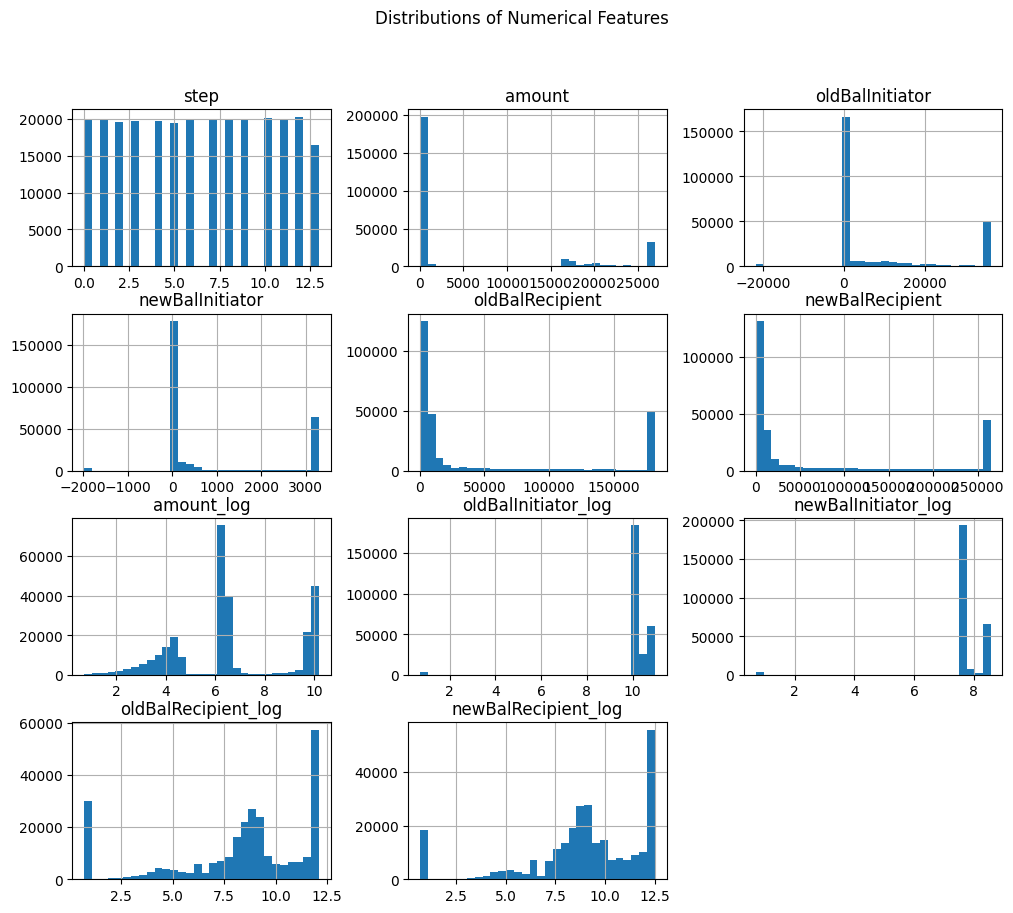

In [14]:
# Display statistical summary for numerical features
stat_summary = df_capped[numerical_cols].describe()
print("Statistical Summary of Numerical Features:")
print(stat_summary)

# Additional insights – checking skewness and kurtosis
skewness = df_capped[numerical_cols].skew()
kurtosis = df_capped[numerical_cols].kurtosis()

print("\nSkewness of Numerical Features:")
print(skewness)

print("\nKurtosis of Numerical Features:")
print(kurtosis)

# Visualizing distributions of numerical features
plt.figure(figsize=(12, 8))
df_capped[numerical_cols].hist(bins=30, figsize=(12, 10), layout=(4, 3))
plt.suptitle("Distributions of Numerical Features")
plt.show()


# **Part 2: Data Preprocessing and Dataset Splitting**

**1.	Implement data cleaning techniques based on your EDA findings**

In [15]:
df_cleaned = df_capped.dropna()  # Drop rows with missing values

print("Data Cleaning Completed. Remaining rows:", df_cleaned.shape[0])


Data Cleaning Completed. Remaining rows: 274209


**2.	Apply appropriate encoding methods for categorical variables**

In [16]:
# Apply One-Hot Encoding only to 'transactionType'
df_cleaned = pd.get_dummies(df_cleaned, columns=['transactionType'], drop_first=True)

print("Categorical Encoding Completed. New Shape:", df_cleaned.shape)

Categorical Encoding Completed. New Shape: (274209, 19)


**3.	Implement feature normalization techniques:**
*   Compare Min-Max scaling and Z-score normalization on at least 3 models




In [17]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

minmax_scaler = MinMaxScaler()
zscore_scaler = StandardScaler()

# Apply Min-Max Scaling
df_minmax = df_cleaned.copy()
df_minmax[numerical_cols] = minmax_scaler.fit_transform(df_minmax[numerical_cols])

# Apply Z-score Normalization
df_zscore = df_cleaned.copy()
df_zscore[numerical_cols] = zscore_scaler.fit_transform(df_zscore[numerical_cols])

print("Feature Normalization Completed.")


Feature Normalization Completed.


In [18]:
# Drop 'recipient' before feature selection
X = df_cleaned.drop(columns=['isFraud', 'recipient'])  # Exclude non-numeric column

**4.	Implement feature selection methods:**

*   Use correlation-based methods
*   Select optimal feature subsets based on findings


In [21]:
from sklearn.feature_selection import SelectKBest, f_classif

# Drop 'recipient' since it's not meaningful for fraud detection
X = df_cleaned.drop(columns=['isFraud', 'recipient'])
y = df_cleaned['isFraud']

# Select top 8 features using ANOVA F-test
selector = SelectKBest(score_func=f_classif, k=8)
X_selected = selector.fit_transform(X, y)

# Get selected feature names
selected_features = X.columns[selector.get_support()]
print("Selected Features:", list(selected_features))


Selected Features: ['amount', 'oldBalInitiator', 'oldBalRecipient', 'newBalRecipient', 'iso_outlier', 'newBalRecipient_log', 'transactionType_PAYMENT', 'transactionType_TRANSFER']


**5.	Dataset Splitting:**
*   Implement random splitting of the dataset




In [22]:
from sklearn.model_selection import train_test_split

X = df_cleaned[selected_features]
y = df_cleaned['isFraud']

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("Dataset Splitting Completed. Train Size:", X_train.shape[0], "Test Size:", X_test.shape[0])


Dataset Splitting Completed. Train Size: 219367 Test Size: 54842


# **Part 3: Model Implementation**
*   Implement and tune the following classification algorithms:



**1.	K-Nearest Neighbors (KNN):**
*   Implement KNN with different distance metrics (Euclidean, Manhattan, Minkowski)




In [23]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

#Different distance metrics
distance_metrics = ['euclidean', 'manhattan', 'minkowski']
k = 5  # Initial k value

for metric in distance_metrics:
    knn = KNeighborsClassifier(n_neighbors=k, metric=metric)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)

    print(f"KNN (k={k}, metric={metric}) Accuracy: {accuracy_score(y_test, y_pred):.4f}")


KNN (k=5, metric=euclidean) Accuracy: 0.9923
KNN (k=5, metric=manhattan) Accuracy: 0.9923
KNN (k=5, metric=minkowski) Accuracy: 0.9923


In [24]:
import joblib

# Save the existing trained model
joblib.dump(knn, 'knn_best_model.pkl')
print("Existing trained KNN model saved as 'knn_best_model.pkl'")


Existing trained KNN model saved as 'knn_best_model.pkl'


* Analyze the effect of varying k values



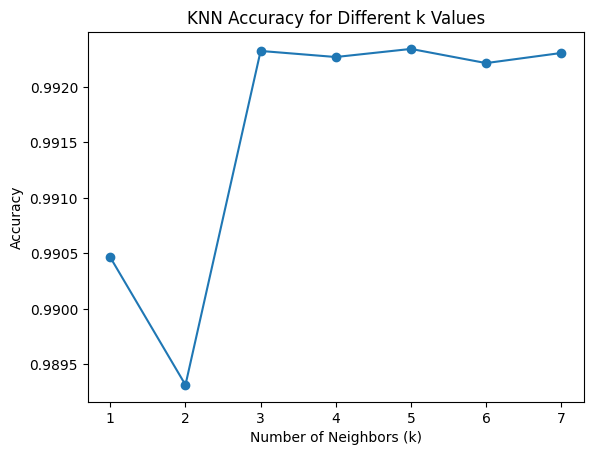

In [25]:
import matplotlib.pyplot as plt

k_values = range(1, 8)
accuracies = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k, metric='euclidean')
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracies.append(accuracy_score(y_test, y_pred))

# Plot accuracy vs k values
plt.plot(k_values, accuracies, marker='o')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.title('KNN Accuracy for Different k Values')
plt.show()


* Optimize the algorithm for the large dataset size

In [26]:
knn_optimized = KNeighborsClassifier(n_neighbors=5, algorithm='auto', leaf_size=30)
knn_optimized.fit(X_train, y_train)
y_pred_optimized = knn_optimized.predict(X_test)

print("Optimized KNN Accuracy:", accuracy_score(y_test, y_pred_optimized))


Optimized KNN Accuracy: 0.9923416359724299


* Test on sample Example

In [27]:
import joblib
import numpy as np

# Load the saved KNN model
knn_loaded = joblib.load('knn_best_model.pkl')

# Example test input (values should be in the same scale as training data)
sample_input = np.array([579.16, 29.32, 29.32, 0, 0, 0, 1, 0]).reshape(1, -1)
# Here, 'transactionType_PAYMENT' = 1 and 'transactionType_TRANSFER' = 0

# Make a prediction
prediction = knn_loaded.predict(sample_input)

print("Predicted Class (isFraud=1, Not Fraud=0):", prediction[0])


Predicted Class (isFraud=1, Not Fraud=0): 0.0


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


**2.	Support Vector Machine (SVM):**
*   Implement SVM with at least three different kernels




In [ ]:
from sklearn.svm import SVC

kernels = ['linear']
for kernel in kernels:
    svm = SVC(kernel=kernel, random_state=42)
    svm.fit(X_train, y_train)
    y_pred = svm.predict(X_test)

    print(f"SVM (Kernel={kernel}) Accuracy: {accuracy_score(y_test, y_pred):.4f}")


In [ ]:
import joblib

# Save the trained SVM model
joblib.dump(svm, 'svm_linear_model.pkl')
print("SVM model saved as 'svm_linear_model.pkl'")


* Apply regularization techniques (C parameter tuning)

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from joblib import Parallel, delayed

# Function to train SVM for a given C value
def train_svm(C):
    svm = SVC(kernel='rbf', C=C, random_state=42)
    svm.fit(X_train, y_train)
    y_pred = svm.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    return f"SVM (C={C}) Accuracy: {accuracy:.4f}"

C_values = [0.01, 0.1, 1, 10]

# Train in parallel
results = Parallel(n_jobs=-1)(delayed(train_svm)(C) for C in C_values)

# Print results
for res in results:
    print(res)


In [ ]:
from sklearn.linear_model import SGDClassifier

svm_sgd = SGDClassifier(loss='hinge', alpha=0.01, max_iter=1000, random_state=42)
svm_sgd.fit(X_train, y_train)
y_pred_sgd = svm_sgd.predict(X_test)

print("SGD SVM Accuracy:", accuracy_score(y_test, y_pred_sgd))


* Test with Example

In [ ]:
# Load the saved model
svm_loaded = joblib.load('svm_linear_model.pkl')

# Select a test sample (replace 0 with any valid index)
sample_index = 0
X_sample = X_test.iloc[sample_index].values.reshape(1, -1)

# Predict the class
prediction = svm_loaded.predict(X_sample)

# Print the result
print(f"Predicted Class (isFraud=1, Not Fraud=0): {prediction[0]}")


**3.	Decision Trees:**
*   Implement and tune decision tree classifiers



In [28]:
from sklearn.tree import DecisionTreeClassifier

depths = [3, 5, 10, None]
for depth in depths:
    tree = DecisionTreeClassifier(max_depth=depth, random_state=42)
    tree.fit(X_train, y_train)
    y_pred = tree.predict(X_test)

    print(f"Decision Tree (Depth={depth}) Accuracy: {accuracy_score(y_test, y_pred):.4f}")


Decision Tree (Depth=3) Accuracy: 0.9916
Decision Tree (Depth=5) Accuracy: 0.9942
Decision Tree (Depth=10) Accuracy: 0.9941
Decision Tree (Depth=None) Accuracy: 0.9924


In [29]:
import joblib

# Save the last trained Decision Tree model from the loop
joblib.dump(tree, 'decision_tree_model.pkl')

print("Decision Tree model saved as 'decision_tree_model.pkl'")

Decision Tree model saved as 'decision_tree_model.pkl'


* Analyze the effect of tree depth, min samples split, and other hyperparameters

In [30]:
tree = DecisionTreeClassifier(max_depth=5, min_samples_split=10, min_samples_leaf=5, random_state=42)
tree.fit(X_train, y_train)
y_pred = tree.predict(X_test)

print("Decision Tree with Tuned Hyperparameters Accuracy:", accuracy_score(y_test, y_pred))


Decision Tree with Tuned Hyperparameters Accuracy: 0.9942197585791911


* Visualize and interpret at least one decision tree

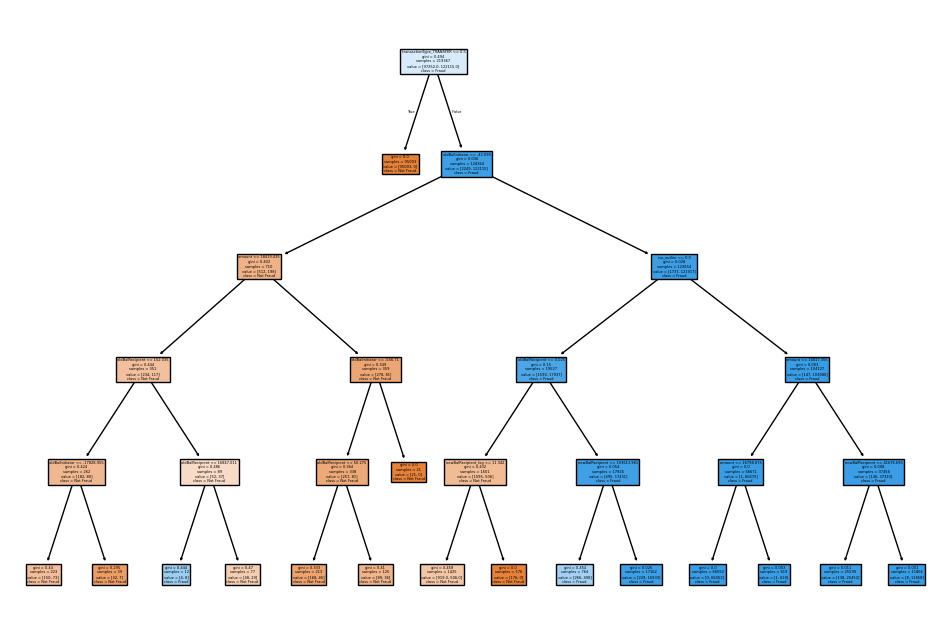

In [31]:
from sklearn.tree import plot_tree

plt.figure(figsize=(12, 8))
plot_tree(tree, feature_names=X_train.columns, class_names=['Not Fraud', 'Fraud'], filled=True)
plt.show()


* Test With Example

In [32]:
import joblib

# Load the saved model
loaded_tree = joblib.load('decision_tree_model.pkl')

# Example test input (make sure it has the same feature order as training data)
test_sample = [[5000, 10000, 5000, 8000, 3000, 8.99, 1, 0]]  # Example feature values

# Predict
predicted_class = loaded_tree.predict(test_sample)

# Output result
print(f"Predicted Class (isFraud=1, Not Fraud=0): {predicted_class[0]}")


Predicted Class (isFraud=1, Not Fraud=0): 0.0


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


**4.	Regression for Classification:**

*  Implement logistic regression for this classification task




In [33]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(max_iter=500, random_state=42)
log_reg.fit(X_train, y_train)
y_pred = log_reg.predict(X_test)

print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred))


Logistic Regression Accuracy: 0.9906823237664564


In [34]:
import joblib

# Save the trained Logistic Regression model
joblib.dump(log_reg, 'logistic_regression_model.pkl')

print("Logistic Regression model saved as 'logistic_regression_model.pkl'")


Logistic Regression model saved as 'logistic_regression_model.pkl'


* Apply regularization techniques (L1, L2)

In [35]:
# L1 Regularization (Lasso)
log_reg_l1 = LogisticRegression(penalty='l1', solver='liblinear', max_iter=500, random_state=42)
log_reg_l1.fit(X_train, y_train)
print("Logistic Regression (L1) Accuracy:", accuracy_score(y_test, log_reg_l1.predict(X_test)))

# L2 Regularization (Ridge)
log_reg_l2 = LogisticRegression(penalty='l2', solver='liblinear', max_iter=500, random_state=42)
log_reg_l2.fit(X_train, y_train)
print("Logistic Regression (L2) Accuracy:", accuracy_score(y_test, log_reg_l2.predict(X_test)))


Logistic Regression (L1) Accuracy: 0.9906823237664564
Logistic Regression (L2) Accuracy: 0.7722001385799205


* Test With Example

In [36]:
import joblib
import numpy as np

# Load the saved Logistic Regression model
log_reg_loaded = joblib.load('logistic_regression_model.pkl')

# Example test input (Replace with real values based on selected features)
test_sample = np.array([[1000, 5000, 4000, 2000, 3000, 7.6, 1, 0]])  # Example data with 8 features

# Predict the fraud class (0 = Not Fraud, 1 = Fraud)
predicted_class = log_reg_loaded.predict(test_sample)
print(f"Predicted Class (isFraud=1, Not Fraud=0): {predicted_class[0]}")


Predicted Class (isFraud=1, Not Fraud=0): 1.0


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


* Compare the performance against other classification methods

In [ ]:
from sklearn.metrics import classification_report

models = {
    "KNN": knn_optimized,
    "SVM": SVC(kernel='rbf', C=1, random_state=42),
    "Decision Tree": tree,
    "Logistic Regression": log_reg
}

for name, model in models.items():
    y_pred = model.predict(X_test)
    print(f"\n{name} Performance:\n")
    print(classification_report(y_test, y_pred))


# **Part 4: Model Evaluation and Comparison**
1.  Implement a comprehensive evaluation framework using:
*	Accuracy, Precision, Recall, F1-score
*	Confusion matrices
*	Classification reports






In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def evaluate_model(model, X_test, y_test, model_name):
    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    print(f"\n{model_name} Evaluation:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-Score: {f1:.4f}")

# Evaluate all models
evaluate_model(knn_optimized, X_test, y_test, "K-Nearest Neighbors")
evaluate_model(SVC(kernel='rbf', C=1, random_state=42), X_test, y_test, "Support Vector Machine")
evaluate_model(tree, X_test, y_test, "Decision Tree")
evaluate_model(log_reg, X_test, y_test, "Logistic Regression")


In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

def plot_confusion_matrix(model, X_test, y_test, model_name):
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)

    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title(f"Confusion Matrix - {model_name}")
    plt.show()

# Plot confusion matrices
plot_confusion_matrix(knn_optimized, X_test, y_test, "KNN")
plot_confusion_matrix(SVC(kernel='rbf', C=1, random_state=42), X_test, y_test, "SVM")
plot_confusion_matrix(tree, X_test, y_test, "Decision Tree")
plot_confusion_matrix(log_reg, X_test, y_test, "Logistic Regression")


In [ ]:
from sklearn.metrics import classification_report

models = {
    "KNN": knn_optimized,
    "SVM": SVC(kernel='rbf', C=1, random_state=42),
    "Decision Tree": tree,
    "Logistic Regression": log_reg
}

for name, model in models.items():
    y_pred = model.predict(X_test)
    print(f"\n{name} Classification Report:\n")
    print(classification_report(y_test, y_pred))


2.	Analyze the performance of each model on imbalanced classes (if present)
3.	Compare the computational efficiency of each model (training time, prediction time)
4.	Determine which models perform best for which classes


In [ ]:
import numpy as np

unique, counts = np.unique(y_train, return_counts=True)
print("Class Distribution:", dict(zip(unique, counts)))


In [ ]:
import time

def compute_time(model, X_train, y_train, X_test, model_name):
    start_train = time.time()
    model.fit(X_train, y_train)
    end_train = time.time()

    start_pred = time.time()
    model.predict(X_test)
    end_pred = time.time()

    print(f"\n{model_name} Training Time: {end_train - start_train:.4f} sec")
    print(f"{model_name} Prediction Time: {end_pred - start_pred:.4f} sec")

# Measure time for each model
compute_time(knn_optimized, X_train, y_train, X_test, "KNN")
compute_time(SVC(kernel='rbf', C=1, random_state=42), X_train, y_train, X_test, "SVM")
compute_time(tree, X_train, y_train, X_test, "Decision Tree")
compute_time(log_reg, X_train, y_train, X_test, "Logistic Regression")
